# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I have chosen to analyze the TMDb (The Movie Database) data set. I will analyze this data set to answer the following questions:

   > 1. Which genre was the most produced each year? 

   > 2. Is there any correlation between a movie's budget and it's popularity?
    
   > 3. Which genre has the higher average popularity, Horror or Action?
   
   > 4. When compared to the highest rated movie, do most movies tend to have higher or lower vote averages?
   
   >5. Which genre had the highest total popularity each year?

> I begin my analysis by loading the required packages in the next cell.

In [46]:
#importing packages needed to run the code below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix
import itertools
from more_itertools import unique_everseen
from matplotlib.ticker import ScalarFormatter
% matplotlib inline

## Exploratory Data Analysis

### General Properties

#### After loading the required packages, I will load the dataset into the project, confirm its presence, and then inspecting it to determine it's general properties.

In [47]:
#Loading the data set
df_movies=pd.read_csv('tmdb-movies.csv')

#Verifying that the dataset is properly loaded by previewing it.
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Data Set has been properly loaded.

In [48]:
#Viewing the columns, datatypes and checking for missing values.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Using the info() function, I can see the column names, their datatypes, and how many values each has. Since there are a total of 10866 rows, any column that has less than that is missing data, which will be addressed later. Next I'll observe some basic qualities of the data set columns using the describe() function.

In [49]:
#Viewing basic information and statistics about the columns in the table
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Using the describe() function, I can observe some basic properties of the columns values, such as their mean (average), maximum/minimum value, standard deviation, percentile ranges, and the count of non-null values in the column. These values are only calculated for the columns with numerical data types. Some interesting information that can be gleaned from the data above is:

- Movie runtimes range from 0 (where presumably no data was entered) to a whopping 900 minutes for one movie!

- Some movies were voted on by users at a much higher rate than others, with vote counts ranging from 10 to 9767!

- According to the percentile ranges for the runtime column, most movies fall between 90 and 120 minutes!

##### I invoke a correlation matrix of the columns to detail the direction (positive, negative or neutral) of the relationships between the columns and the strength of those relationships (strong, weak, or moderate). I then plot the result in a heatmap for a better look.

In [50]:
#Creating a correlation matrix
df_movies.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


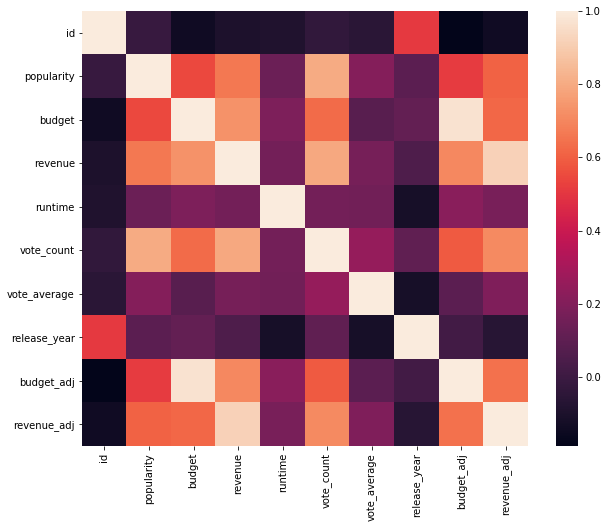

In [51]:
#Creating a heatmap to display a visual of the above matrix.
f, ax = plt.subplots(figsize=(10, 8))
corr = df_movies.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

##### According to the above matrix and heatmap, the budget column seems to have a moderately strong correlation with the popularity and revenue columns. 

##### This seems to positively answer one of my inquries (Is there any correlation between a movie's budget and it's popularity?). I'll see if that changes once the data is cleaned. 

##### Another interesting find is that although a movie's vote count seems to positively correlate with its budget and revenue, it's vote average does not.

##### As far as the numerical columns go, I believe that I will be working with the budget, revenue, popularity, and vote_averages columns the most. To get a bit more of a feel for these columns, I will use a histogram for each to see the distribution of their values. I use a differnet color for each histogram for better readability.

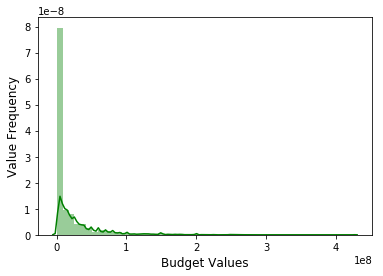

In [52]:
#Creating a histogram of the "Budget" column
sb.distplot(df_movies["budget"],color="green")
plt.xlabel('Budget Values', fontsize=12)
plt.ylabel('Value Frequency', fontsize=12)
plt.show()

##### The budget column's values seem to be skewed to the right a bit. There are no missing values in this column according to analysis performed earlier; however there are some movie entries that have a value of 0 for this field. It seems that most movies have a budget between 0 and 1.

##### NOTE: Measured in hundreds of millions (i.e. The "1" on the X-axis above stands for $100 million).

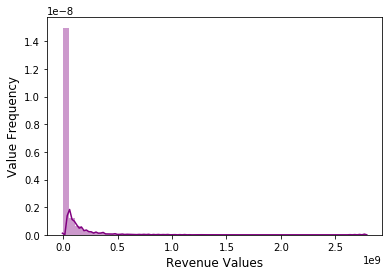

In [53]:
#Creating a histogram of the "Revenue" column
sb.distplot(df_movies["revenue"],color="purple")
plt.xlabel('Revenue Values', fontsize=12)
plt.ylabel('Value Frequency', fontsize=12)
plt.show()

##### Similar to the budget column, the revenue column skews to the right as well, though not quite as sharply. This could support the notion of a positive correlation between the two, such as was shown earlier in the correlation matrix.

##### NOTE: Measured in hundreds of millions (i.e. The "1" on the X-axis above stands for $100 million).

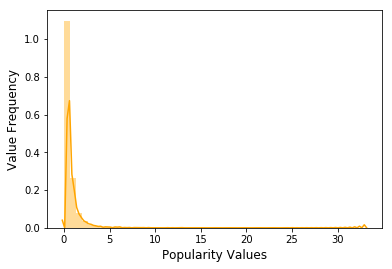

In [54]:
#Creating a histogram of the "Popularity" column
sb.distplot(df_movies["popularity"],color="orange")
plt.xlabel('Popularity Values', fontsize=12)
plt.ylabel('Value Frequency', fontsize=12)
plt.show()

##### The values in the popularity column also skew to the right. Most values seem to be between 0 and 5. 

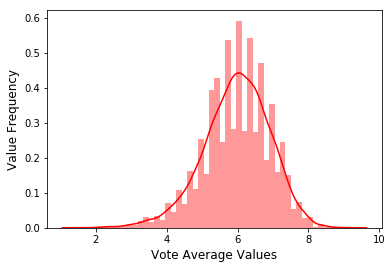

In [55]:
#Creating a histogram of the "Vote Average" column
sb.distplot(df_movies["vote_average"],color="red")
plt.xlabel('Vote Average Values', fontsize=12)
plt.ylabel('Value Frequency', fontsize=12)
plt.show()

##### The vote average column seems to be almost evenly distributed compared to the other columns, resulting in a bell curve chart pattern.

##### Now that preliminary data exploration is done, I will begin the process of cleaning the data set for final analysis.

<a id='wrangling'></a>
## Data Wrangling

### Data Cleaning: Addressing Unnecessary Data, Duplicates, and Missing Values

#### According to the results of the below statement, the table has 10866 rows and 21 columns.

In [56]:
#Displaying the amount of rows and columns in the data set
df_movies.shape

(10866, 21)

##### The names of the 21 columns are listed below.

In [57]:
#Displaying the column names
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Column Descriptions:
>ID: Row ID number.

>Imdb_ID: Movie ID within TMDB database, taken from the IMDB database.

>Popularity: Average popularity of a movie according to critics.

>Budget: The movie's budget.

>Revenue: The movie's revenue.

>Origianl_Title: The Movie's original title.

>Cast: Movie cast listing.

>Homepage: The URL for the movie's official website.

>Director: The movie's director. Some have multiple.

>Tagline: The promotional tagline for the movie.

>Keywords: Keywords that can be used to search for the movie within the TMDB database.

>Overview: A summary of the movie's plot.

>Runtime: Movie runtime in minutes.

>Genres: What genres the movie falls under. Multiple may apply.

>Production_Companies: Production company of the movie. Multiple may apply.

>Release_Date: Movie release date in mm/dd/yyyy format.

>Vote_Count: Number of TMDB users who voted on this movie.

>Vote_Average: The average of the imdb user votes for this movie.

>Release_Year: The movie release year.

>Budget_adj: The movie's budget adjusted for inflation.

>Revenue_adj: The movie's revenue adjusted for inflation.

#### Before starting analysis, the data set needs to be cleaned to cut out unnecessary columns, duplicates and missing values. Also, some columns have multiple values (separated by pipes like this |) that need to be divided. I will begin by first removing rows with empty values.

In [58]:
#Remove rows that contain empty values
df_movies = df_movies.dropna(how='any',axis=0)

#Confirm that the rows have been dropped - "False" should be returned.
df_movies.isnull().sum().any()

False

In [59]:
#Checking for duplicates in the rows that remain
df_movies.duplicated(keep=False).sum()

0

In [60]:
#Showing the new number of rows - 1992.
#There are still 21 columns at this time
df_movies.shape

(1992, 21)

#### Rows with missing values have been dropped, leavng us with 1992 rows. No duplicates are detected, so no need to drop them! Now I will examine the columns to figure out which ones I do not need for my analysis, and drop them.

In [61]:
#Showing column names and datatypes
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

#### For my analysis, I will keep these columns:

    Popularity
    Budget
    Revenue
    Original Title
    Genres
    Production Companies
    Vote Average
    Release Year

#### The remaining columns I will drop in the following code cell, then confirm the drop in the next.

In [62]:
#Dropping un-needed columns
df_movies.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [63]:
#Confirming dropped columns, only 8 columns remain
df_movies.shape

(1992, 8)

#### Now that all un-needed columns, missing values and duplicates have been seen to, I need to examine the columns I have left for multiple values.

In [64]:
#First, I sample the data to find all columns that have multiple values
df_movies.head(20)

,popularity,budget,revenue,original_title,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015
5,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,2015
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,5.8,2015
7,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,7.6,2015
8,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,8.0,2015


#### Upon examination, the "genres" and the "production_companies" columns are the only ones that have multiple entries per row. In the code cell below I begin the process of separating the values to create two new groups of rows, and then append the rows to the data set.

In [65]:
#Filtering the genres column for fields with multiple values
edit_gen_columns = df_movies[df_movies['genres'].str.contains('|')]

#Confirming the filter
edit_gen_columns

,popularity,budget,revenue,original_title,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015
5,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,2015
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,5.8,2015
7,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,7.6,2015
8,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,8.0,2015


In [66]:
#Separating the values into new rows
edit_gen_columns = (edit_gen_columns.set_index(['popularity', 'budget', 'revenue', 'original_title']) #index columns (before the target column) will not be affected by split
   .stack() #stack rows to create a series
   .str.split('|', expand=True) #call the split function to divide values by pipe (|)
   .stack() #stack rows again to eliminate null values
   .unstack(-2) #unstack remaining values to create new columns
   .reset_index(-1, drop=True) #drop temporary index
   .reset_index() #restore orignal index
)
#Showing the new rows
edit_gen_columns

,popularity,budget,revenue,original_title,genres,production_companies
0,0.000620,0,0,G.B.F.,Comedy,School Pictures
1,0.000620,0,0,G.B.F.,NaN,Parting Shots Media
2,0.000620,0,0,G.B.F.,NaN,Logolite Entertainment
3,0.001372,0,0,The Invisible War,Crime,Canal+
4,0.001372,0,0,The Invisible War,Drama,Chain Camera Pictures
5,0.001372,0,0,The Invisible War,History,ITVS
6,0.001372,0,0,The Invisible War,Documentary,Rise Films
7,0.001372,0,0,The Invisible War,NaN,Girls' Club Entertainment
8,0.003432,0,0,Jim Jefferies: I Swear to God,Comedy,HBO
9,0.005391,0,887029,More Than a Game,Documentary,Harvey Mason Media


#### The new genre rows are now created. I then repeat the process with the production companies column.

In [67]:
#Filtering the production_companies column for fields with multiple values
edit_pro_columns = df_movies[df_movies['production_companies'].str.contains('|')]

#Confirming the filter
edit_pro_columns

,popularity,budget,revenue,original_title,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015
5,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,2015
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,5.8,2015
7,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,7.6,2015
8,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,8.0,2015


In [68]:
#Separating the values into new rows
edit_pro_columns = (edit_pro_columns.set_index(['popularity', 'budget', 'revenue', 'original_title']) #index columns (before the target column) will not be affected by split
   .stack() #stack rows to create a series
   .str.split('|', expand=True) #call the split function to divide values by pipe (|)
   .stack() #stack rows again to eliminate null values
   .unstack(-2) #unstack remaining values to create new columns
   .reset_index(-1, drop=True) #drop temporary index
   .reset_index() #restore orignal index
)
#Showing the new rows
edit_pro_columns

,popularity,budget,revenue,original_title,genres,production_companies
0,0.000620,0,0,G.B.F.,Comedy,School Pictures
1,0.000620,0,0,G.B.F.,NaN,Parting Shots Media
2,0.000620,0,0,G.B.F.,NaN,Logolite Entertainment
3,0.001372,0,0,The Invisible War,Crime,Canal+
4,0.001372,0,0,The Invisible War,Drama,Chain Camera Pictures
5,0.001372,0,0,The Invisible War,History,ITVS
6,0.001372,0,0,The Invisible War,Documentary,Rise Films
7,0.001372,0,0,The Invisible War,NaN,Girls' Club Entertainment
8,0.003432,0,0,Jim Jefferies: I Swear to God,Comedy,HBO
9,0.005391,0,887029,More Than a Game,Documentary,Harvey Mason Media


#### After creating both sets of rows, I then append them to each other to create a new row set called edited_rows. edited_rows is then appended to the original df_movies dataset after the original genre and production companies columns are cleaned to remove the rows within them that have multiple data values.

In [69]:
#appending the two sets of new rows together
edited_rows = edit_gen_columns.append(edit_pro_columns)

#removing rows with multiple values in the genres and production_companies columns of the original data set
df_movies = df_movies[(~df_movies["genres"].str.contains('\|') & ~df_movies["production_companies"].str.contains('\|'))]

#append the edited rows to the original data set
df_movies = df_movies.append(edited_rows, ignore_index=True, sort=True)

#check the new number of rows and columns in the updated dataset
df_movies.shape

(13675, 8)

In [70]:
#showing the edited_rows variable to verify its content
edited_rows

,popularity,budget,revenue,original_title,genres,production_companies
0,0.000620,0,0,G.B.F.,Comedy,School Pictures
1,0.000620,0,0,G.B.F.,NaN,Parting Shots Media
2,0.000620,0,0,G.B.F.,NaN,Logolite Entertainment
3,0.001372,0,0,The Invisible War,Crime,Canal+
4,0.001372,0,0,The Invisible War,Drama,Chain Camera Pictures
5,0.001372,0,0,The Invisible War,History,ITVS
6,0.001372,0,0,The Invisible War,Documentary,Rise Films
7,0.001372,0,0,The Invisible War,NaN,Girls' Club Entertainment
8,0.003432,0,0,Jim Jefferies: I Swear to God,Comedy,HBO
9,0.005391,0,887029,More Than a Game,Documentary,Harvey Mason Media


After spliting the columns and appending the new rows, I again check for duplicates and remove null values.

#Again remove rows that contain empty values
df_movies = df_movies.dropna(how='any',axis=0)

#Confirm that the rows have been dropped - "False" should be returned.
df_movies.isnull().sum().any()

#### After removing rows with null values, I find that almost rows left contain at least one and are thus removed, leaving me with only 93 rows - most still with empty budget fields! To perform more accurate analysis the null values must remain, so the cell above was changed to a markdown cell to stop it from running, but retain it for documentation. I then recompiled the cell below to confirm that the change was undone.

In [71]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 8 columns):
budget                  13675 non-null int64
genres                  10339 non-null object
original_title          13675 non-null object
popularity              13675 non-null float64
production_companies    11443 non-null object
release_year            93 non-null float64
revenue                 13675 non-null int64
vote_average            93 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 854.8+ KB


#### I then drop duplicate rows from the data set again.

In [72]:
#Checking for duplicates in the rows that remain. 13582 are found
df_movies.duplicated(keep=False).sum()

13582

In [73]:
#dropping duplicates
df_movies.drop_duplicates(inplace=True)

In [74]:
#checking number of duplicates again. No more are found.
df_movies.duplicated(keep=False).sum()

0

In [75]:
#6884 rows are left
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 8 columns):
budget                  6884 non-null int64
genres                  5216 non-null object
original_title          6884 non-null object
popularity              6884 non-null float64
production_companies    5768 non-null object
release_year            93 non-null float64
revenue                 6884 non-null int64
vote_average            93 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 484.0+ KB


## Inquiries

### Data Inquiry #1
##### Which genre was the most produced each year?

In [76]:
#Counting the number of movies in each unique genre for each unique release year
df = df_movies.groupby(['release_year'])['genres'].value_counts().reset_index(name = 'Count')

#Assigning the counted value to a new column and adding it to the dataframe
df['Count_max'] = df.groupby(['release_year'])['Count'].transform(max) == df['Count']

#Adding another column that confimrs whether the value displayed is indeed the highest values for that year's genre
df[df['Count_max'] == True]

,release_year,genres,Count,Count_max
0,1993.0,Horror,1,True
1,1997.0,Family,1,True
2,2000.0,Comedy,1,True
3,2000.0,Drama,1,True
4,2000.0,Thriller,1,True
5,2001.0,Comedy,1,True
6,2003.0,Documentary,1,True
7,2004.0,Comedy,2,True
8,2004.0,Drama,2,True
9,2005.0,Comedy,1,True


##### The above code outputs a table that displays the most produced genre of each year in the data set, as well as how many movies were in said genre that year.

##### Note - At some point the year values converted to float datatype from int datatype. I was unfortunately unable to fix this.

### Data Inquiry #2
##### Is there any correlation between a movie's budget and it's popularity?

Text(0,0.5,'Budget')

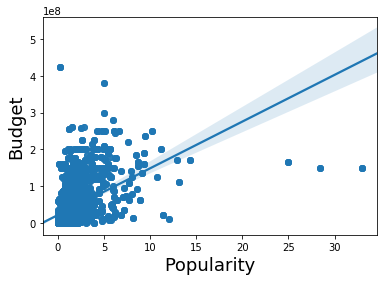

In [77]:
#Plotting the correlation between movie popularity and movie budget
sb.regplot(x="popularity", y="budget", data=df_movies);
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Budget', fontsize=18)

#### The relationship between a movie's popularity and its budget seem to show a moderately positive correlation. This confirmed by calculating the numerical correlation in the cell below. A correlation of 0.4878, roughly 49 percent, is returned.

In [78]:
budget = df_movies['budget']
popularity = df_movies['popularity']

pop_bud_corr = budget.corr(popularity)
pop_bud_corr

0.48780072654504469

### Data Inquiry #3
##### Which genre has the higher average popularity, Horror or Action?

Text(0,0.5,'Popularity')

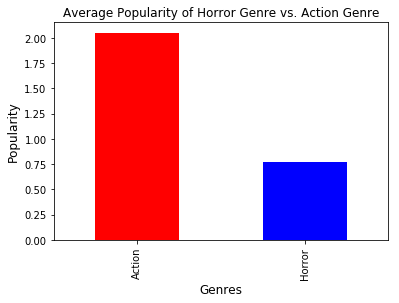

In [79]:
#Filtering the Data Set for movies with a genre of either Horror or Action
sorted_movies=df_movies[df_movies.genres.isin(['Horror','Action'])]

#Gathering the mean (average) values of each genre's popularity
genre_pop_averages=sorted_movies.groupby('genres')['popularity'].mean()

#Plotting the values in a bar chart using matplotlib
genre_pop_averages.plot(kind='bar',title='Average Popularity of Horror Genre vs. Action Genre',color=['red','blue'],alpha=1)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

#### As seen in the chart above, Action movies are much more popular on average than Horror movies.

### Data Inquiry #4
##### When compared to the highest rated movie, do most movies tend to have higher or lower vote averages?

Text(0.5,0,'Vote Average Values Range')

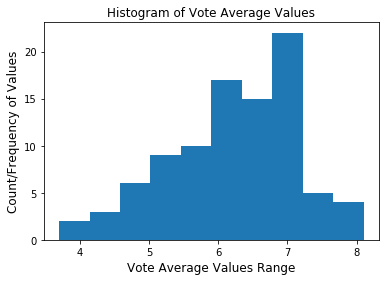

In [80]:
#df_movies.hist('vote_average')
df_movies['vote_average'].plot(kind='hist',title='Histogram of Vote Average Values',alpha=1)
plt.ylabel('Count/Frequency of Values', fontsize=12)
plt.xlabel('Vote Average Values Range', fontsize=12)

##### The data on vote averages indicates that most movies fall below the highest rated movie.

### Data Inquiry #5
##### Which genre had the highest total popularity each year?

/opt/conda/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:1105: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis)


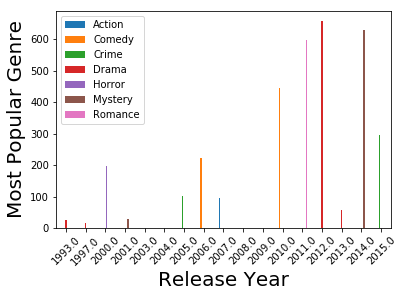

In [81]:
#Sum of popularity ratings for each release year
Total_Pop=df_movies.groupby(['release_year'],sort=True)['popularity'].sum()

#Group the result by genre name
Total_Pop_Year=Total_Pop.groupby(df_movies['genres'],sort=True).apply(pd.DataFrame)

#Multiply population values by 100 for better chart visibility
Total_Pop_Mult=Total_Pop_Year.iloc[:,:7].apply(lambda x : x*100)
    
#plot the result 
Total_Pop_Mult.plot(kind='bar')
plt.ylabel('Most Popular Genre', fontsize=20)
plt.xlabel('Release Year', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [82]:
Total_Pop_Mult

,Action,Comedy,Crime,Drama,Horror,Mystery,Romance
release_year,,,,,,,
1993.0,NaN,NaN,NaN,23.8862,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,15.2550,NaN,NaN,NaN
2000.0,NaN,NaN,NaN,NaN,196.0204,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,27.4314,NaN
2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005.0,NaN,NaN,101.068,NaN,NaN,NaN,NaN
2006.0,NaN,221.6967,NaN,NaN,NaN,NaN,NaN
2007.0,95.1211,NaN,NaN,NaN,NaN,NaN,NaN


##### The above chart and table reflect that the 'Drama' genre was the most popular in the highest number of years (Four years - 1993, 1997, 2012, 2013). Other genres were only most popular in one or two years.

<a id='conclusions'></a>
## Conclusions

> In summary, analysis of this data set shows:

> Movies within the Comedy genre tend to have been the most popular over the last 20 years, with Comedy being the most popular genre in 7 different years. Horror, Family, and Thriller movies tend to have been the least popular, winning most popular genre in only 1 year each.

> There is no discernable relationship between the amount spent making a movie and it's popularity.

> On average, Action movies have been much more popular than Horror movies over the twenty year period covered by this dataset.

> Most movies tend to have lower average votes among viewers, when compared to the highest rated movie in the data set.

> Drama movies tend to be the most popular genre in most cases.

### Limitations

> These results were calculated from a subset (6,800 rows) of the entire data set (over 10,000 rows) and thus may not be as accurate as is possible. Non null values were purged and should not affect calculations, but zero values were included in calculations for some rows/columns. No statistical calculations or inferences were made. Also, the above findings are not meant to be taken as fact, but merely suggestions or educated guesses as to the relationship of the variables in the dataset. Any correlations that were found are not meant to imply causation without a doubt, but rather present it as a possibility.

In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])